# **Stock Market Prediction** 📈
Predicting stock market performance involves forecasting the future value of a specific stock, a particular sector, or the overall market. This service is highly sought after by companies looking to capitalize on their stock's trends for profit. However, it's a challenging task due to the stock market's sensitivity to various global factors, leading to its unpredictability and volatility. Investment banks play a crucial role in assisting companies, individuals, and governments in financial transactions.
### Team_Zed
- Ankush H V
- Aneesh K B
- Arnab K

In [1]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.3 MB/s eta 0:00:00


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style


%matplotlib inline
# style.use('ggplot')
sns.set_theme(style="darkgrid")
from ydata_profiling import ProfileReport
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


/kaggle/input/ue21cs342aa2/sample_submission.csv
/kaggle/input/ue21cs342aa2/train.csv
/kaggle/input/ue21cs342aa2/test.csv


# EDA
columns: 

- Date
- Open
- Close
- Volume
- Strategy

In [3]:
train = pd.read_csv("/kaggle/input/ue21cs342aa2/train.csv", index_col = 'Date', parse_dates=['Date'])
test = pd.read_csv("/kaggle/input/ue21cs342aa2/test.csv", index_col = 'Date', parse_dates=['Date'])

In [4]:
train['Strategy'] = train['Strategy'].astype('category')

In [5]:
display(train.head())
display(train.describe())
display(train.info())
print(train.index.dtype)

,id,Open,Close,Volume,Strategy
Date,,,,,
2015-06-01,0,66.208486,75.609978,298506300,Hold
2015-06-08,1,64.116235,74.443331,227974800,Hold
2015-06-15,2,47.701942,71.140831,250670900,Buy
2015-06-22,3,54.754816,72.881344,223614300,Hold
2015-06-29,4,48.031899,66.284718,406814900,Buy


,id,Open,Close,Volume
count,300.000000,300.000000,300.000000,3.000000e+02
mean,149.500000,75.977813,79.430489,1.866300e+08
std,86.746758,16.158343,13.878395,7.952792e+07
min,0.000000,40.269435,47.979353,5.991330e+07
25%,74.750000,64.872395,69.689227,1.324862e+08
50%,149.500000,79.805683,82.991900,1.715536e+08
75%,224.250000,88.342927,89.719145,2.201842e+08
max,299.000000,102.558322,103.119373,6.935702e+08


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 300 entries, 2015-06-01 to 2021-02-22
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        300 non-null    int64   
 1   Open      300 non-null    float64 
 2   Close     300 non-null    float64 
 3   Volume    300 non-null    int64   
 4   Strategy  300 non-null    category
dtypes: category(1), float64(2), int64(2)
memory usage: 12.1 KB


None

datetime64[ns]


In [6]:
display(test.head())
display(test.info())

,id,Open,Volume
Date,,,
2021-03-01,0,72.708331,205897600
2021-03-08,1,73.310886,214095600
2021-03-15,2,70.610119,151601700
2021-03-22,3,70.256017,193982500
2021-03-29,4,68.258324,220238400


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2021-03-01 to 2023-01-23
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      100 non-null    int64  
 1   Open    100 non-null    float64
 2   Volume  100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 3.1 KB


None

In [7]:
profile = ProfileReport(train, title="Pandas Profiling Report")

In [8]:
train.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
train['Strategy_encoded'] = train['Strategy'].cat.codes
display(train['Strategy_encoded'].value_counts())

Strategy_encoded
1    143
2     79
0     78
Name: count, dtype: int64

In [10]:
np.corrcoef(train['Strategy_encoded'], train['Close'])

array([[1.        , 0.35317074],
       [0.35317074, 1.        ]])

In [11]:
train.loc[:,['Open', 'Close', 'Volume','Strategy_encoded']].corr()

,Open,Close,Volume,Strategy_encoded
Open,1.000000,0.927795,-0.461010,0.298590
Close,0.927795,1.000000,-0.458788,0.353171
Volume,-0.461010,-0.458788,1.000000,-0.132971
Strategy_encoded,0.298590,0.353171,-0.132971,1.000000


In [12]:
train['Lag_1'] = train['Close'].shift(1)
train['Lag_1'] = train['Lag_1'].mask(train['Lag_1'].isna(), train['Close'])
train['Open_lag'] = train['Open'].shift(1)
train['Open_lag'] = train['Open_lag'].mask(train['Open_lag'].isna(), train['Open'])

In [13]:
train.head()

,id,Open,Close,Volume,Strategy,Strategy_encoded,Lag_1,Open_lag
Date,,,,,,,,
2015-06-01,0,66.208486,75.609978,298506300,Hold,1,75.609978,66.208486
2015-06-08,1,64.116235,74.443331,227974800,Hold,1,75.609978,66.208486
2015-06-15,2,47.701942,71.140831,250670900,Buy,0,74.443331,64.116235
2015-06-22,3,54.754816,72.881344,223614300,Hold,1,71.140831,47.701942
2015-06-29,4,48.031899,66.284718,406814900,Buy,0,72.881344,54.754816


Text(0.5, 1.0, 'Correlation Heatmap')

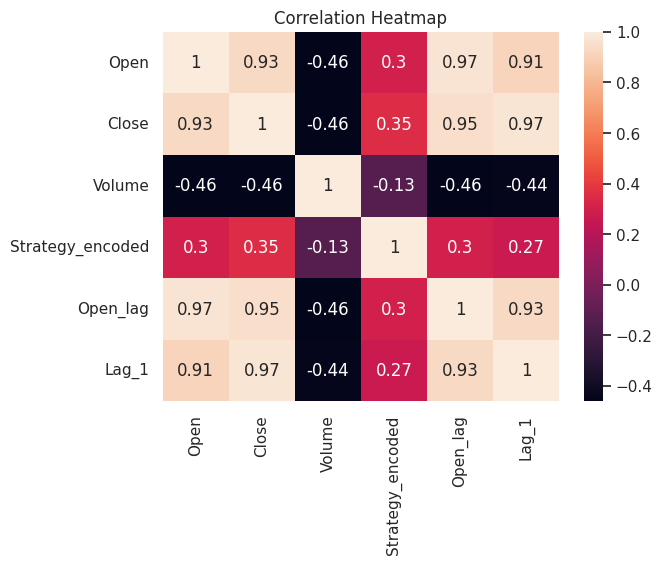

In [14]:
heatmap = sns.heatmap(train.loc[:,['Open', 'Close', 'Volume','Strategy_encoded','Open_lag','Lag_1']].corr(), annot=True)
heatmap.set_title('Correlation Heatmap')

<Axes: xlabel='Lag_1', ylabel='Close'>

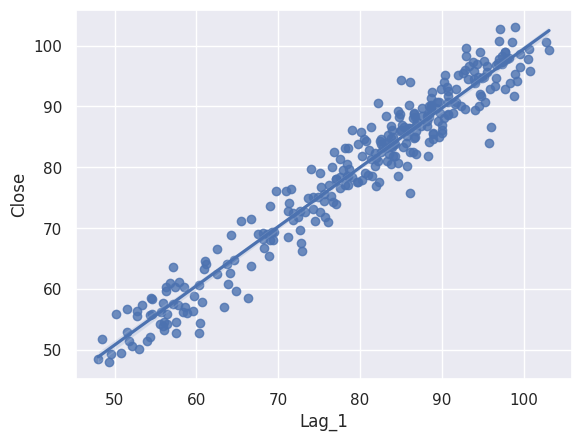

In [15]:
sns.regplot(data=train, x='Lag_1', y='Close', fit_reg=True, scatter=True)

<Axes: xlabel='Open', ylabel='Close'>

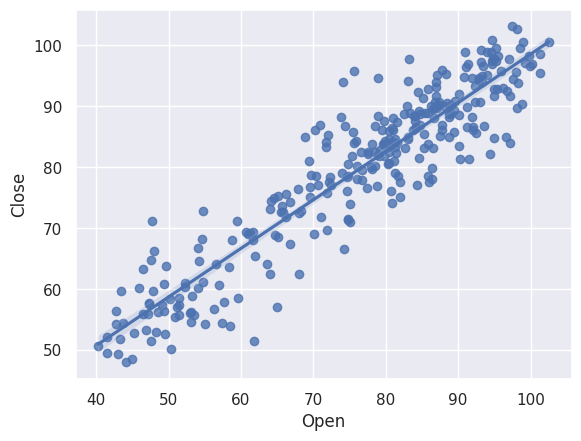

In [16]:
sns.regplot(data=train, x='Open', y='Close', fit_reg=True, scatter=True)

<Axes: xlabel='Open_lag', ylabel='Close'>

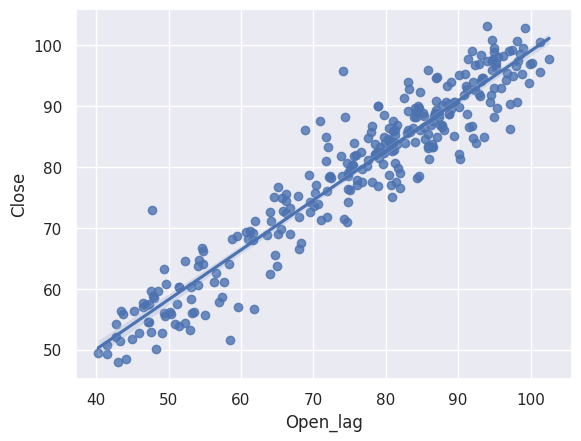

In [17]:
sns.regplot(data=train, x='Open_lag', y='Close', fit_reg=True, scatter=True)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


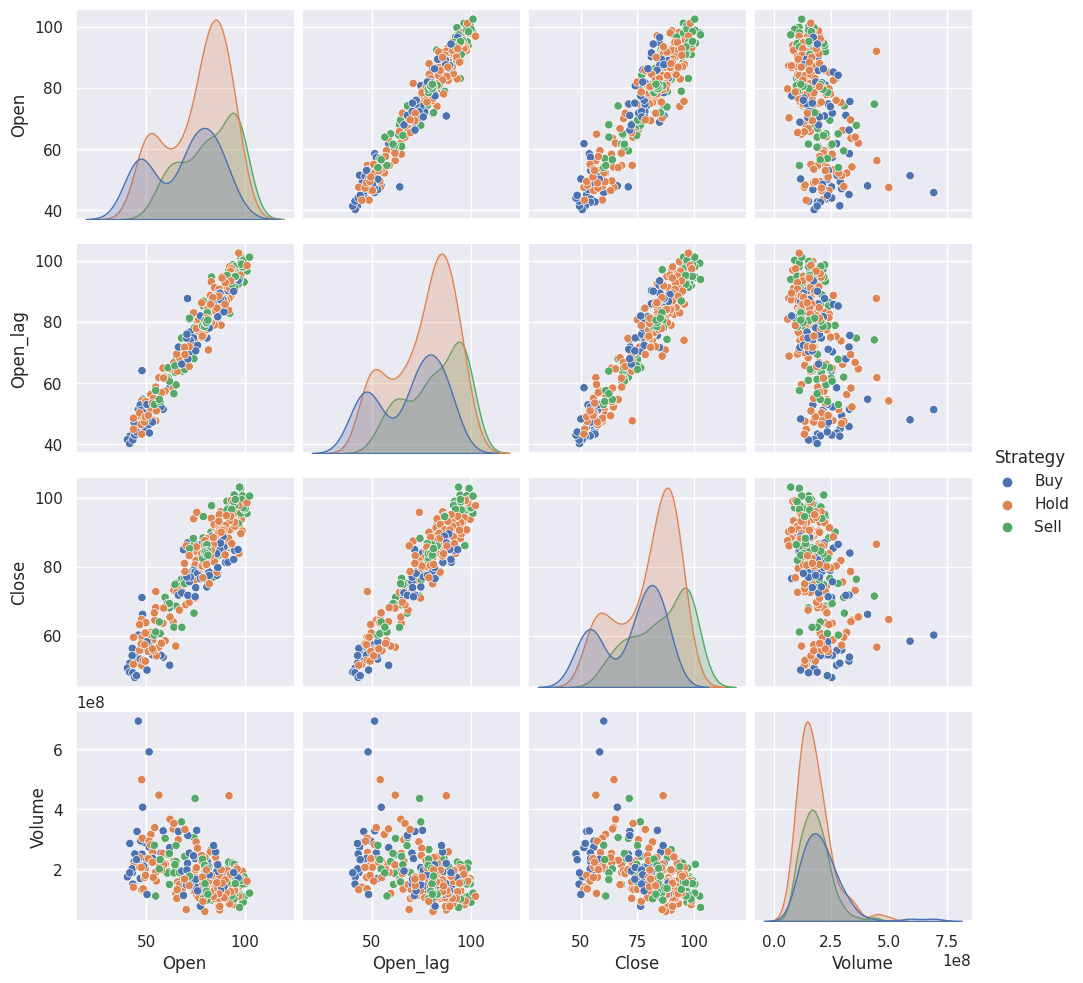

In [18]:
sns.pairplot(train.loc[:,['Open','Open_lag','Close','Volume','Strategy']], hue="Strategy")

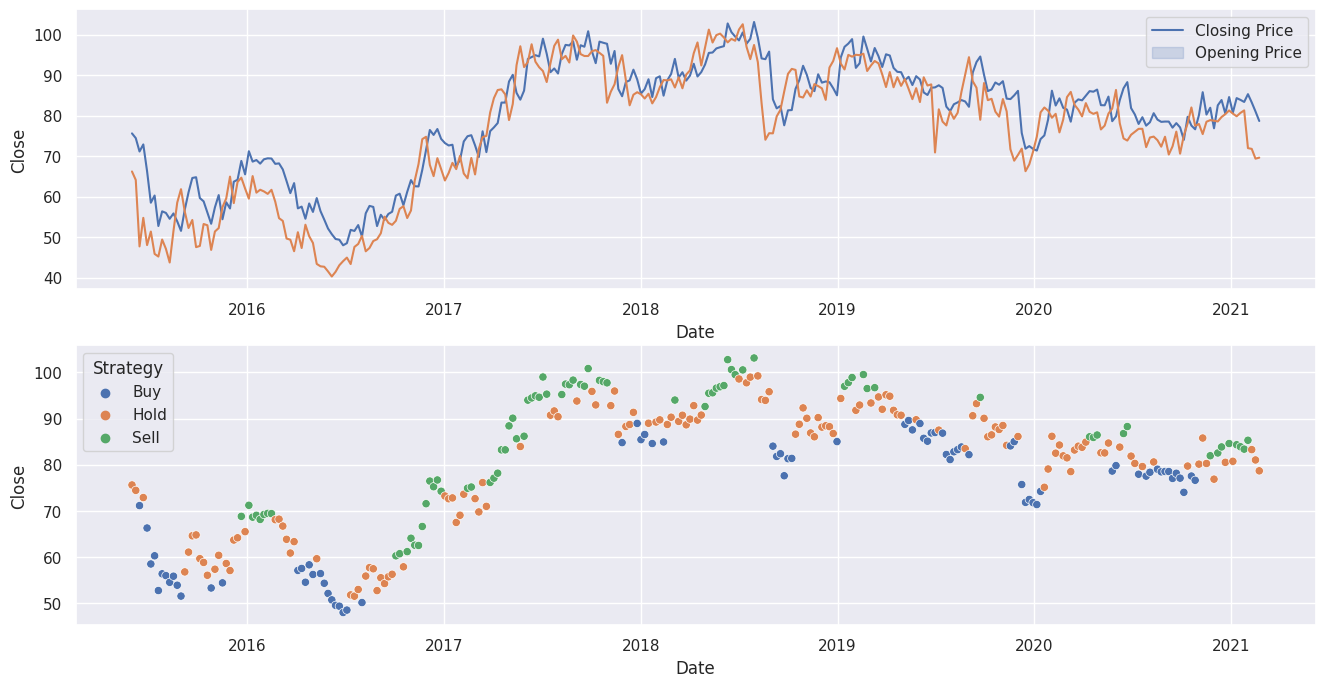

In [19]:
# Create a Matplotlib figure and axis
fig, axes = plt.subplots(figsize=(16, 8), nrows=2)
# Plot the first lineplot
sns.lineplot(x=train.index, y="Close", data=train, ax=axes[0],)
sns.lineplot(x=train.index, y="Open", data=train, ax=axes[0])
axes[0].legend(labels=['Closing Price','Opening Price'])
# Plot the second lineplot with hue
sns.scatterplot(x=train.index, y="Close", hue="Strategy", data=train, ax=axes[1])
axes[1].legend(title="Strategy")
# fig.tight_layout()
plt.show()

The plot suggests a common trading strategy where stocks are sold when closing prices are high and bought when closing prices are low. This approach is often referred to as a "buy low, sell high" strategy, and it aims to maximize profits by purchasing stocks at lower prices and selling them when prices are higher.

# Decomposing closing stock price

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decompose(data):
    ss_decomposition = seasonal_decompose(x=data, model='additive')
    estimated_trend = ss_decomposition.trend
    estimated_seasonal = ss_decomposition.seasonal
    estimated_residual = ss_decomposition.resid

    fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
    fig.set_figheight(10)
    fig.set_figwidth(15)

    axes[0].plot(data, label='Original')
    axes[0].legend(loc='upper left');

    axes[1].plot(estimated_trend, label='Trend')
    axes[1].legend(loc='upper left');

    axes[2].plot(estimated_seasonal, label='Seasonality')
    axes[2].legend(loc='upper left');

    axes[3].plot(estimated_residual, label='Residuals')
    axes[3].legend(loc='upper left');

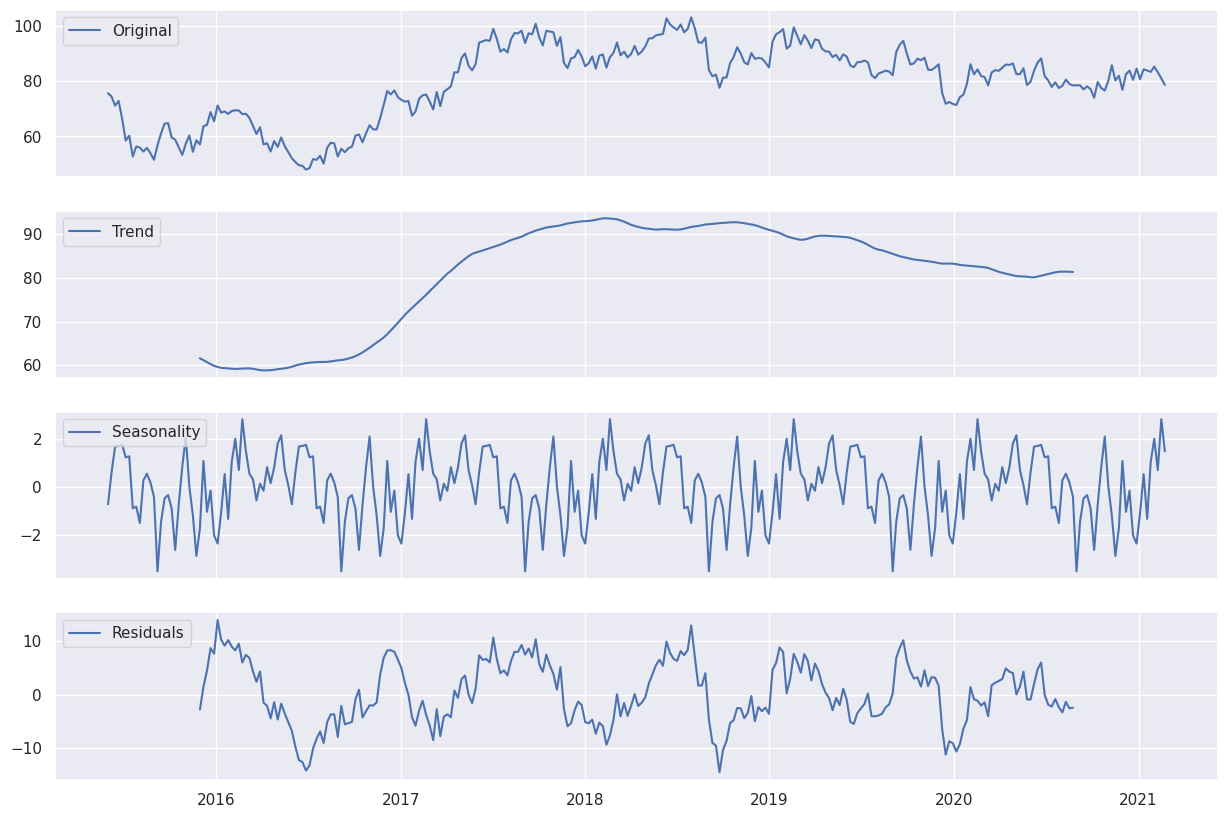

In [21]:
decompose(train['Close'])

<Axes: xlabel='Strategy'>

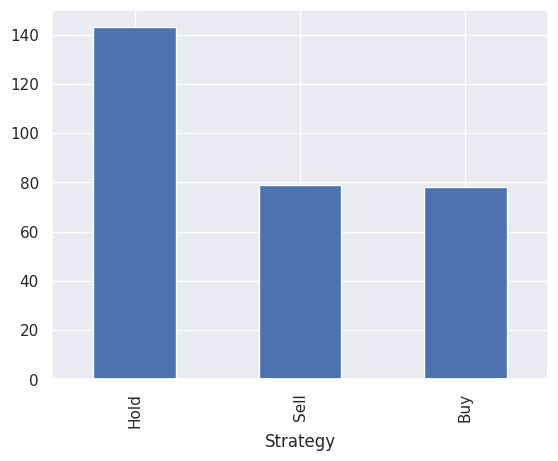

In [22]:
train['Strategy'].value_counts().plot.bar()

# Test for stationarity

### ADF Test
ADF test is conducted with the following assumptions:

- **Null Hypothesis (HO)**: Series is non-stationary, or series has a unit root.
- **Alternate Hypothesis (HA)**: Series is stationary, or series has no unit root.

### KPSS Test
The KPSS test is conducted with the following assumptions:

- **Null Hypothesis (HO)**: Series is trend stationary or series has no unit root.
- **Alternate Hypothesis (HA)**: Series is non-stationary, or series has a unit root.

In [23]:
from statsmodels.tsa.stattools import adfuller, kpss
def adf_test(data):
    print("\nObservations of Dickey-fuller test")
    dftest = adfuller(data, autolag=None)
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['critical value (%s)'%key]= value
    print(dfoutput)
    
def kpss_test(data):
    print ('\nResults of KPSS Test:')
    kpsstest = kpss(data, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [24]:
adf_test(train['Close'])
kpss_test(train['Close'])


Observations of Dickey-fuller test
Test Statistic                  -1.720507
p-value                          0.420579
#lags used                      16.000000
number of observations used    283.000000
critical value (1%)             -3.453670
critical value (5%)             -2.871808
critical value (10%)            -2.572241
dtype: float64

Results of KPSS Test:
Test Statistic            1.300008
p-value                   0.010000
#Lags Used               10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/tmp/ipykernel_20/1320633072.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(data, regression='c', nlags="auto")


In [25]:
train['differenced_close'] = train['Close'].diff(1)
train['differenced_close'].head()

Date
2015-06-01         NaN
2015-06-08   -1.166647
2015-06-15   -3.302500
2015-06-22    1.740512
2015-06-29   -6.596626
Name: differenced_close, dtype: float64

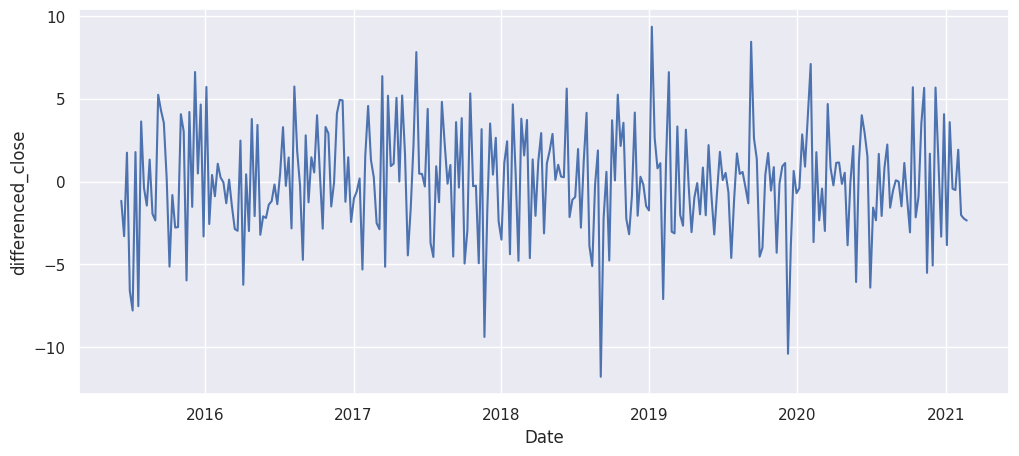

In [26]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(x=train.index, y="differenced_close", data=train, ax=ax)
plt.show()

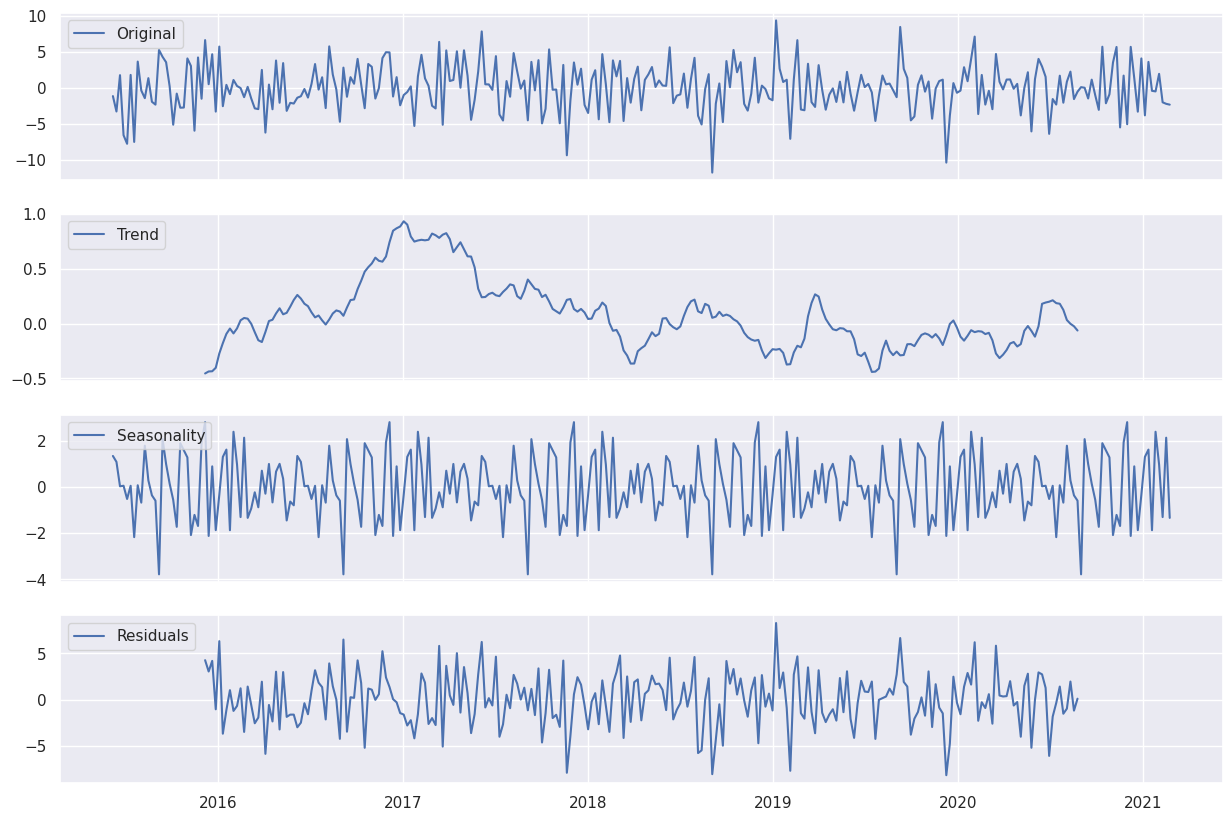

In [27]:
decompose(train['differenced_close'].dropna())

In [28]:
adf_test(train['differenced_close'].dropna())
kpss_test(train['differenced_close'].dropna())


Observations of Dickey-fuller test
Test Statistic                  -4.518303
p-value                          0.000182
#lags used                      16.000000
number of observations used    282.000000
critical value (1%)             -3.453754
critical value (5%)             -2.871844
critical value (10%)            -2.572261
dtype: float64

Results of KPSS Test:
Test Statistic           0.078154
p-value                  0.100000
#Lags Used               5.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/tmp/ipykernel_20/1320633072.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(data, regression='c', nlags="auto")


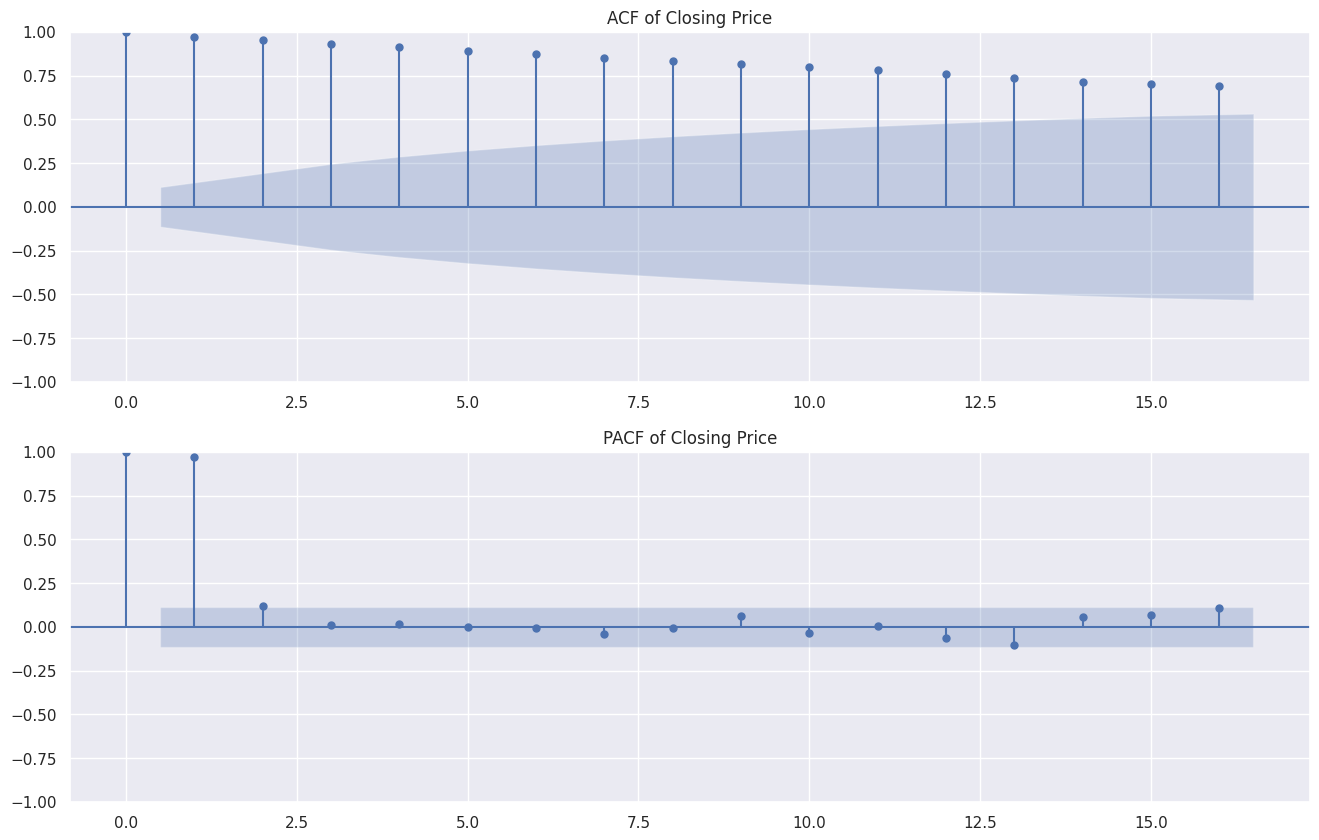

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(figsize=(16,10),nrows=2)
plot_acf(train['Close'], lags=16, ax=axes[0])
axes[0].set_title('ACF of Closing Price')
plot_pacf(train['Close'], lags=16, ax=axes[1])
axes[1].set_title('PACF of Closing Price')
plt.show()

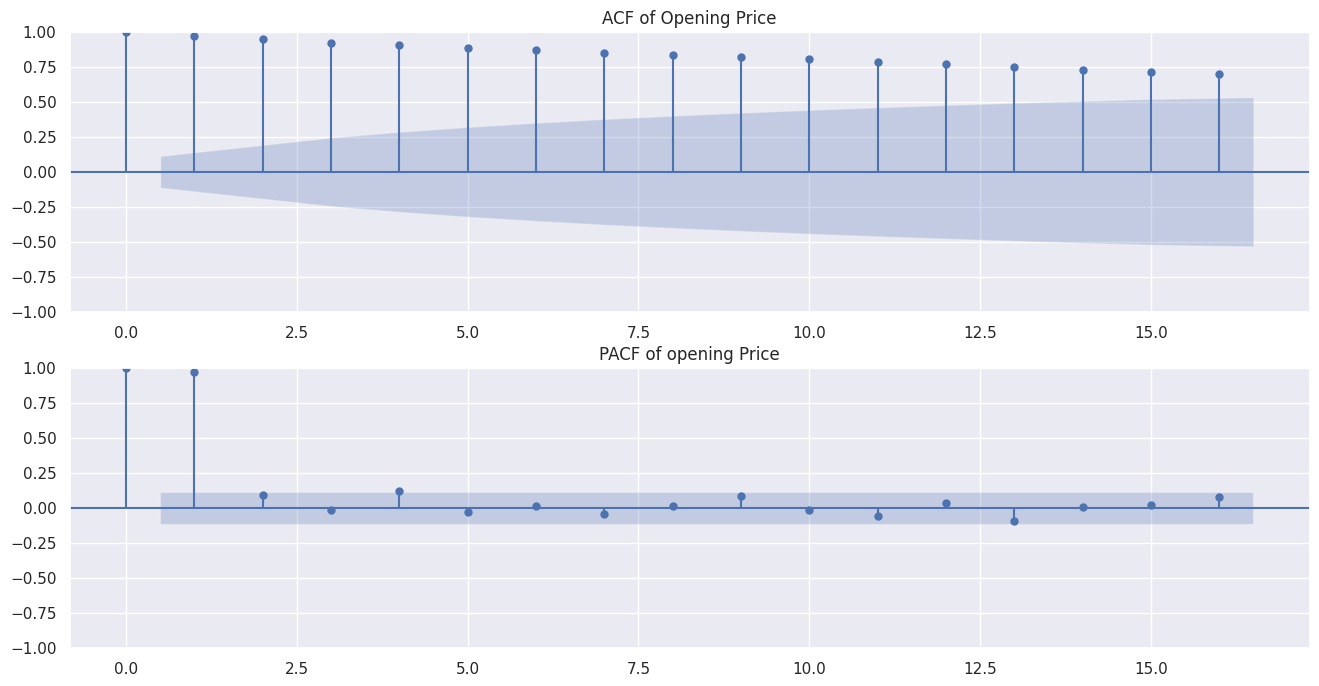

In [30]:
fig, axes = plt.subplots(figsize=(16,8),nrows=2)
plot_acf(train['Open'], lags=16, ax=axes[0])
axes[0].set_title('ACF of Opening Price')
plot_pacf(train['Open'], lags=16, ax=axes[1])
axes[1].set_title('PACF of opening Price')
plt.show()

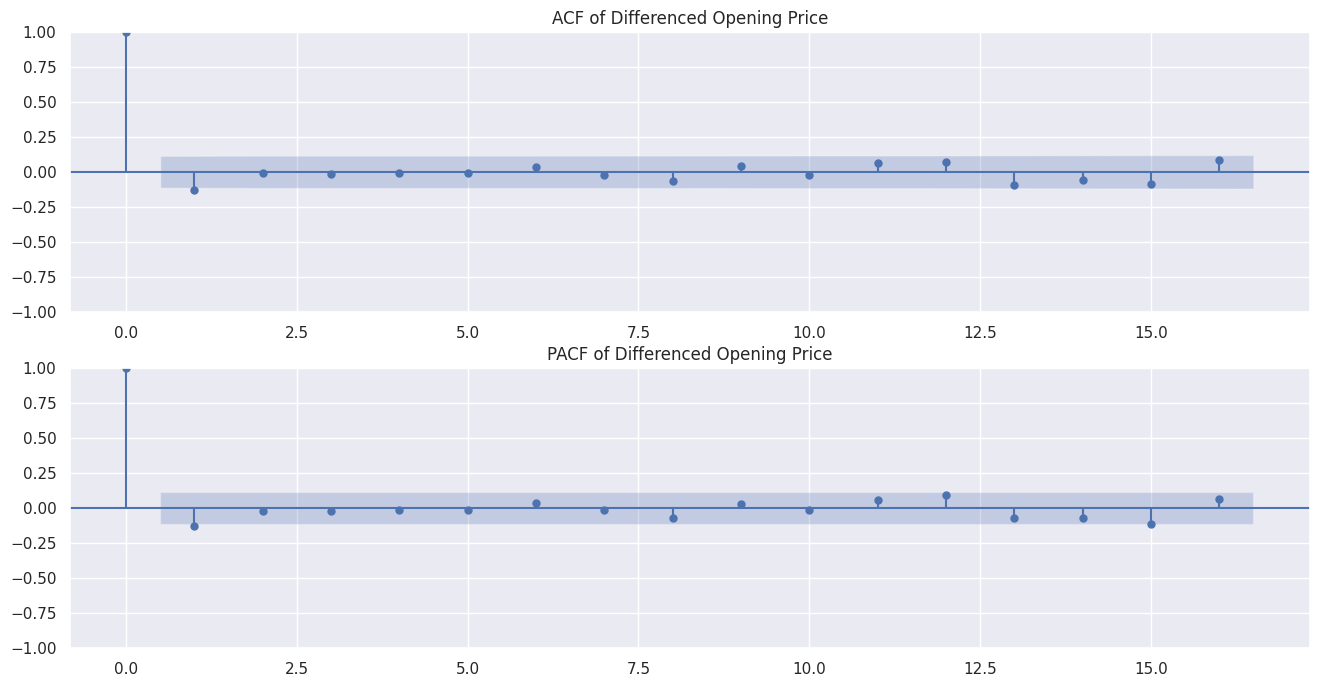

In [31]:
fig, axes = plt.subplots(figsize=(16,8),nrows=2)
plot_acf(train['differenced_close'].dropna(), lags=16, ax=axes[0])
axes[0].set_title('ACF of Differenced Opening Price')
plot_pacf(train['differenced_close'].dropna(), lags=16, ax=axes[1])
axes[1].set_title('PACF of Differenced Opening Price')
plt.show()

# Test Train Split

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 300 entries, 2015-06-01 to 2021-02-22
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 300 non-null    int64   
 1   Open               300 non-null    float64 
 2   Close              300 non-null    float64 
 3   Volume             300 non-null    int64   
 4   Strategy           300 non-null    category
 5   Strategy_encoded   300 non-null    int8    
 6   Lag_1              300 non-null    float64 
 7   Open_lag           300 non-null    float64 
 8   differenced_close  299 non-null    float64 
dtypes: category(1), float64(5), int64(2), int8(1)
memory usage: 27.6 KB


In [33]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits=2, test_size=int(len(train) * 0.2))
X = train.iloc[:,[1,3,7]]
y = train.iloc[:, 3]
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
display(X_train.head())
display(X_test.head())
print(f"Number of training samples: {len(X_train)}, Number of validation samples: {len(X_test)}")

,Open,Volume,Open_lag
Date,,,
2015-06-01,66.208486,298506300,66.208486
2015-06-08,64.116235,227974800,66.208486
2015-06-15,47.701942,250670900,64.116235
2015-06-22,54.754816,223614300,47.701942
2015-06-29,48.031899,406814900,54.754816


,Open,Volume,Open_lag
Date,,,
2020-01-06,74.811495,235950300,71.108020
2020-01-13,80.812144,206277900,74.811495
2020-01-20,82.002162,134102500,80.812144
2020-01-27,81.211918,186548400,82.002162
2020-02-03,79.468382,217464300,81.211918


Number of training samples: 240, Number of validation samples: 60


# Creating ARIMAX Model

In [34]:
import statsmodels.api as sm

In [35]:
from pmdarima.arima import auto_arima
model = auto_arima(y_train, exogenous=X_train, trace=True, error_action="ignore", suppress_warnings=True)
model_fit = model.fit(y_train, exogenous=X_train)
model_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9300.301, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9344.241, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9322.139, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9300.782, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9342.243, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9303.457, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9288.260, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9286.255, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=9301.622, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=9307.375, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=9281.754, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=9298.789, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=9320.143, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=9283.395, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  240
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -4637.877
Date:                Thu, 26 Oct 2023   AIC                           9281.754
Time:                        21:07:28   BIC                           9292.184
Sample:                    06-01-2015   HQIC                          9285.957
                         - 12-30-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4020      0.040     10.048      0.000       0.324       0.480
ma.L1         -0.9364      0.038    -24.803      0.000      -1.010      -0.862
sigma2      4.539e+15        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               245.65
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                             1.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [36]:
# Define the SARIMA model with appropriate orders
order = (1, 0, 0)  # Replace p, d, q with appropriate values
#seasonal_order = (P, D, Q, s)  # Replace P, D, Q, and s with appropriate values

# Fit the SARIMA model to the training data
model = sm.tsa.SARIMAX(y_train, exog=X_train, order=order)
results = model.fit()
results.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05914D+01    |proj g|=  2.90537D+20

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      1     21      1     0     0   2.905D+20  -1.059D+01
  F =  -10.591405631419921     

ABNORMAL_TERMINATION_IN_LNSRCH                              


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Volume   No. Observations:                  240
Model:               SARIMAX(1, 0, 0)   Log Likelihood                2541.937
Date:                Thu, 26 Oct 2023   AIC                          -5073.875
Time:                        21:07:29   BIC                          -5056.472
Sample:                    06-01-2015   HQIC                         -5066.862
                         - 12-30-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open       -9.313e-10   4.65e-06     -0.000      1.000   -9.12e-06    9.11e-06
Volume         1.0000   6.08e-13   1.64e+12      0.000       1.000       1.000
Open_lag   -2.328e-10    4.3e-06  -5.41e-05      1.000   -8.43e-06    8.43e-06
ar.L1          0.8409   3.15e-11   2.67e+10      0.000       0.841       0.841
sigma2          1e-10   1.39e-10      0.718      0.473   -1.73e-10    3.73e-10
===================================================================================
Ljung-Box (L1) (Q):                  12.74   Jarque-Bera (JB):               282.03
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.13e+26. Standard errors may be unstable.
"""

In [37]:
# Forecast future values (specify the number of periods to forecast)
forecast_periods = len(X_test)  # You can change this to the number of periods you want to forecast
forecast = results.get_forecast(steps=forecast_periods, exog=X_test)

# Extract the predicted values and associated confidence intervals
predicted_values = forecast.predicted_mean
conf_int = forecast.conf_int()

In [38]:
def smape(actual, forecast):
    actual = np.array(actual)
    forecast = np.array(forecast)
    
    # Calculate the absolute percentage errors
    absolute_errors = np.abs(actual - forecast)
    absolute_percentage_errors = (absolute_errors / (np.abs(actual) + np.abs(forecast))) * 2.0
    
    # Calculate the mean of the absolute percentage errors
    smape_value = np.mean(absolute_percentage_errors) * 100
    
    return smape_value

In [39]:
from sklearn.metrics import mean_squared_error
metrics = pd.Series([smape(y_test, predicted_values), mean_squared_error(y_test, predicted_values), np.sqrt(mean_squared_error(y_test, predicted_values))], index=['SMAPE', 'MSE', "RMSE"])
print("Model Performance")
display(metrics)

Model Performance


SMAPE    2.782964e-14
MSE      5.229150e-15
RMSE     7.231287e-08
dtype: float64

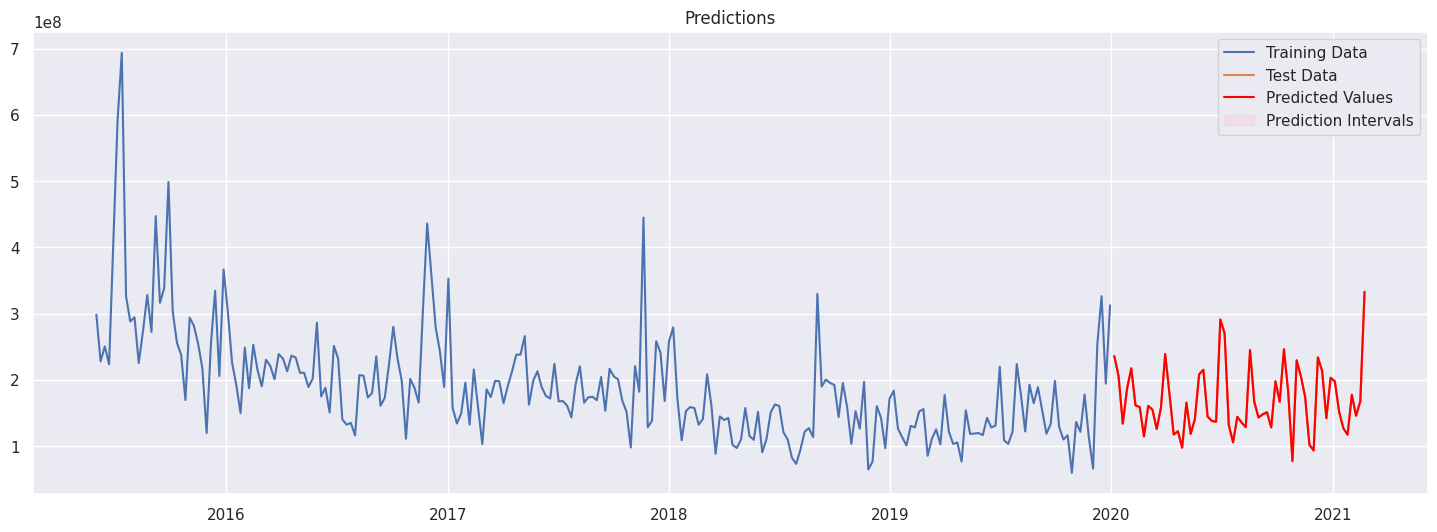

In [40]:
# Plot the original data
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(y_train, label='Training Data')
ax.plot(y_test, label='Test Data')

# Plot the predicted values
ax.plot(predicted_values, color='red', label='Predicted Values')
ax.set_title('Predictions')
# Plot the prediction intervals (optional)
ax.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='Prediction Intervals')

ax.legend()
plt.show()

# Your model creation, training and inferencing code, along with suitable analysis and reasoning!

In [41]:
# submission = pd.DataFrame()
# submission["Date"] = test["Date"]

In [42]:
# sample_submission = pd.read_csv('/kaggle/input/ue21cs342aa2/sample_submission.csv', index_col = 0)

In [43]:
# submission["Close"] = sample_submission["Close"]
# submission["Strategy"] = sample_submission["Strategy"]

### In the cell above, we have just provided an example of how to create your submission DataFrame. Please make sure to use **your own forecasts and predictions**, in place of `sample_submission["Close"]` and `sample_submission["Strategy"]`

In [44]:
# submission.head()

In [45]:
# submission.to_csv('submission.csv', index=True)